In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler

In [14]:
df=pd.read_csv('GOOGL.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [16]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))


In [18]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
data=df[['Close']]

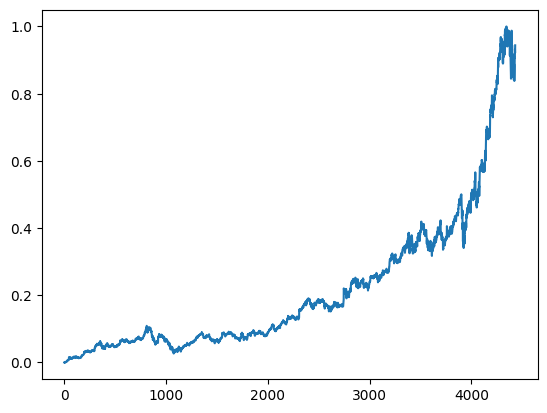

In [19]:
scaled_data = scaler.fit_transform(data)
plt.plot(scaled_data)

In [20]:
def create(time,scaled_data):
    x,y=[],[]
    for i in range(time,len(scaled_data)):
        x.append(scaled_data[i-time:i,0])
        y.append(scaled_data[i,0])
    return np.asarray(x),np.asarray(y)
x,y=create(60,scaled_data)
x=x.reshape(x.shape[0],x.shape[1],1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)



In [21]:
model=Sequential()
model.add(SimpleRNN(units=100,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(SimpleRNN(units=40,return_sequences=True))
model.add(SimpleRNN(units=20,return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss=['mean_squared_error'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 60, 100)           10200     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 60, 40)            5640      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 20)                1220      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 17,081
Trainable params: 17,081
Non-trainable params: 0
_________________________________________________________________


In [22]:
history=model.fit(x_train,y_train,epochs=40,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/40
55/55 [==============================] - 3s 34ms/step - loss: 0.0090 - val_loss: 0.0404
Epoch 2/40
55/55 [==============================] - 1s 26ms/step - loss: 7.7771e-05 - val_loss: 0.0358
Epoch 3/40
55/55 [==============================] - 1s 27ms/step - loss: 7.9813e-05 - val_loss: 0.0317
Epoch 4/40
55/55 [==============================] - 2s 37ms/step - loss: 6.8969e-05 - val_loss: 0.0284
Epoch 5/40
55/55 [==============================] - 2s 36ms/step - loss: 5.8015e-05 - val_loss: 0.0253
Epoch 6/40
55/55 [==============================] - 2s 38ms/step - loss: 8.2775e-05 - val_loss: 0.0224
Epoch 7/40
55/55 [==============================] - 2s 36ms/step - loss: 7.0436e-05 - val_loss: 0.0204
Epoch 8/40
55/55 [==============================] - 2s 37ms/step - loss: 7.7157e-05 - val_loss: 0.0196
Epoch 9/40
55/55 [==============================] - 2s 44ms/step - loss: 6.0546e-05 - val_loss: 0.0167
Epoch 10/40
55/55 [==============================] - 3s 59ms/step - loss: 7.3

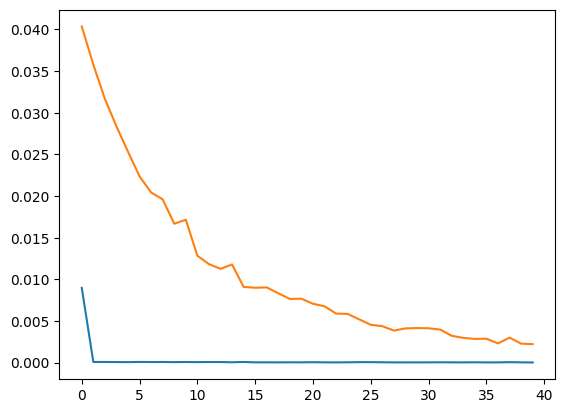

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [48]:
y_predict=model.predict(x_test)


28/28 [==============================] - 0s 3ms/step


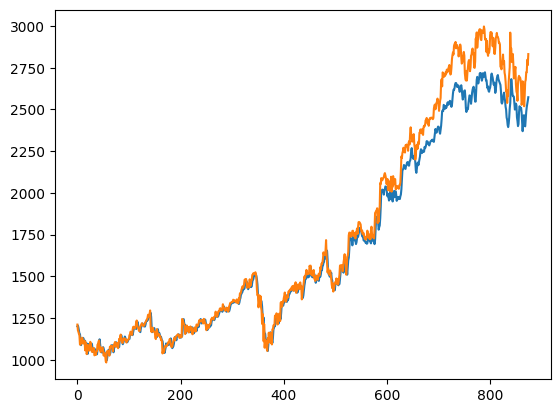

In [49]:
y_predict=scaler.inverse_transform(y_predict)
y_actual=scaler.inverse_transform(y_test.reshape(-1,1))
plt.plot(y_predict)
plt.plot(y_actual)